# Span detection using TF

In [0]:
!pip install -q tensorflow-gpu==2.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 450kB 56.1MB/s 
     |████████████████████████████████| 3.8MB 58.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

In [0]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-02-26 10:47:15--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.06s   

2020-02-26 10:47:15 (8.13 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
!ls


sample_data  spam.csv


In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Dense, Flatten
from tensorflow.keras.layers import LSTM, Embedding

# Text procesing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [0]:
!head spam.csv

UnicodeDecodeError: ignored

In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [0]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [0]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [0]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ["label", "data"]

In [0]:
df.head()

,label,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df["b_label"] = df["label"].map({'ham':0,'spam':1})

In [0]:
df.head()

,label,data,b_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
X = df["data"].values
Y  = df["b_label"].values 

In [0]:
xtrain,xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.33)


In [0]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(3733,) (1839,) (3733,) (1839,)


In [0]:
MAX_VACAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VACAB_SIZE)
tokenizer.fit_on_texts(xtrain)  # build vacabulory
seq_train = tokenizer.texts_to_sequences(xtrain)  # data_train has indexes but it can be variying len
seq_test = tokenizer.texts_to_sequences(xtest)



In [0]:
# print V size
word2idx = tokenizer.word_index

In [0]:
V = len(word2idx)
print(V)

7193


In [0]:
# pad the sequences:
data_train = pad_sequences(seq_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [0]:
data_test = pad_sequences(seq_test, maxlen=T) # making test data same size as train data

In [0]:
data_test.shape

(1839, 189)

**Creating the model for Spam detector**

In [0]:
# model
# use Embedding layer

In [0]:
from tensorflow.keras.layers import GlobalMaxPooling1D

In [0]:
D = 20 # we are choosing for embedding; not for input
M = 15 

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))  # single dimensional data .... 
x = Embedding(V+1,D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation="sigmoid")(x)

model = Model(i,x)

#i = Input(shape=(T,))
#x = Embedding(V + 1, D)(i)
#x = Conv1D(32, 3, activation='relu')(x)
#x = MaxPooling1D(3)(x)
#x = Conv1D(64, 3, activation='relu')(x)
#x = MaxPooling1D(3)(x)
#x = Conv1D(128, 3, activation='relu')(x)
#x = GlobalMaxPooling1D()(x)
#x = Dense(1, activation='sigmoid')(x)

#model = Model(i, x)


In [0]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [0]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 189)]             0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 189, 20)           143880    
_________________________________________________________________
lstm_4 (LSTM)                (None, 189, 15)           2160      
_________________________________________________________________
global_max_pooling1d (Global (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 146,056
Trainable params: 146,056
Non-trainable params: 0
_________________________________________________________________


In [0]:
ytest.shape

(1839,)

In [0]:
data_test.shape

(1839, 189)

In [0]:
data_train.shape

(3733, 189)

In [0]:
ytrain.shape

(3733,)

In [0]:
r = model.fit(data_train,ytrain,
          epochs=10,
          validation_data=(data_test,ytest))



Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 10s 3ms/sample - loss: 0.4474 - accuracy: 0.8661 - val_loss: 0.3733 - val_accuracy: 0.8657
Epoch 2/10
3733/3733 [==============================] - 2s 525us/sample - loss: 0.3311 - accuracy: 0.8661 - val_loss: 0.2977 - val_accuracy: 0.8657
Epoch 3/10
3733/3733 [==============================] - 2s 522us/sample - loss: 0.2716 - accuracy: 0.8661 - val_loss: 0.2603 - val_accuracy: 0.8657
Epoch 4/10
3733/3733 [==============================] - 2s 504us/sample - loss: 0.2325 - accuracy: 0.8661 - val_loss: 0.2250 - val_accuracy: 0.8657
Epoch 5/10
3733/3733 [==============================] - 2s 508us/sample - loss: 0.1930 - accuracy: 0.8661 - val_loss: 0.1858 - val_accuracy: 0.8657
Epoch 6/10
3733/3733 [==============================] - 2s 493us/sample - loss: 0.1459 - accuracy: 0.9735 - val_loss: 0.1468 - val_accuracy: 0.9804
Epoch 7/10
3733/3733 [==============================] - 2s 514us/

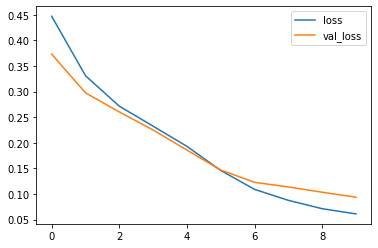

In [0]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

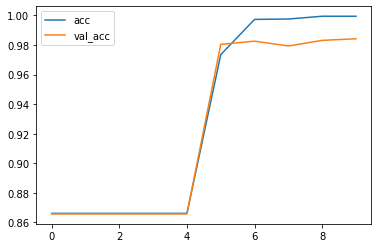

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [0]:
predict = model.predict(data_test)

In [0]:
mean = np.mean(np.round(predict) == ytest)
print(mean)

0.7789886280607974


In [0]:
data_test.shape

(1839, 189)

In [0]:
count = 0
for i in range(1839):
  d = np.round(predict[i]) == ytest[i]
  if d == True:
    count = count+1
    print(d)

[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


In [0]:
print (count)

1810


In [0]:
1810/1839

0.9842305600870038

In [0]:
np.round(predict)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [0]:
ytest

array([0, 0, 0, ..., 1, 0, 0])